In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load Data

In [2]:
df=pd.read_csv("relationships_20_final.csv",sep=";")

# General

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            110323 non-null  object 
 1   Toxicity          109832 non-null  float64
 2   Severe Toxicity   109832 non-null  float64
 3   Profanity         109832 non-null  float64
 4   Identity Attack   109832 non-null  float64
 5   Insult            109832 non-null  float64
 6   Threat            109832 non-null  float64
 7   body              110323 non-null  object 
 8   controversiality  110323 non-null  bool   
 9   created_utc       110323 non-null  object 
 10  edited            110323 non-null  bool   
 11  gilded            110323 non-null  int64  
 12  id                110323 non-null  object 
 13  link_id           110323 non-null  object 
 14  parent_id         110323 non-null  object 
 15  score             110323 non-null  int64  
 16  created_hour      11

In [4]:
df.describe()

Toxicity  Severe Toxicity      Profanity  Identity Attack  \
count  109832.000000    109832.000000  109832.000000    109832.000000   
mean        0.188112         0.020776       0.124670         0.024851   
std         0.196134         0.063891       0.184474         0.054345   
min         0.002749         0.000315       0.005593         0.000303   
25%         0.041420         0.001488       0.018802         0.004107   
50%         0.110783         0.003071       0.037904         0.007437   
75%         0.278628         0.009460       0.127275         0.019174   
max         0.995410         0.990894       0.997712         0.952096   

              Insult         Threat         gilded          score  \
count  109832.000000  109832.000000  110323.000000  110323.000000   
mean        0.105801       0.023596       0.000426      14.032650   
std         0.157179       0.059611       0.023511      96.234399   
min         0.005589       0.000000       0.000000    -280.000000   
25%         0.015645       0.007275       0.000000       1.000000   
50%         0.030596       0.008492       0.000000       2.000000   
75%         0.092704       0.011664       0.000000       6.000000   
max         0.935000       0.855204       3.000000    7240.000000   

        created_hour    created_day  created_year    comment_len  \
count  110323.000000  110323.000000      110323.0  110323.000000   
mean       12.688796      15.819312        2020.0      77.198889   
std         7.123933       8.627573           0.0      86.184695   
min         0.000000       1.000000        2020.0       1.000000   
25%         6.000000       9.000000        2020.0      24.000000   
50%        14.000000      16.000000        2020.0      51.000000   
75%        19.000000      23.000000        2020.0      99.000000   
max        23.000000      30.000000        2020.0    1994.000000   

            compound      Sentiment  
count  110323.000000  110323.000000  
mean        0.224610       0.286223  
std         0.606723       0.909977  
min        -0.999700      -1.000000  
25%        -0.273200      -1.000000  
50%         0.348500       1.000000  
75%         0.791100       1.000000  
max         0.999900       1.000000

# One Feature

# Controversilty

In [5]:
df["controversiality"] = df["controversiality"].replace(0,"0")
df["controversiality"] = df["controversiality"].replace(1,"1")
df["controversiality"]= df["controversiality"].replace("0",False)
df["controversiality"] = df["controversiality"].replace("1",True)


False    107296
True       3027
Name: controversiality, dtype: int64


Text(0, 0.5, '')

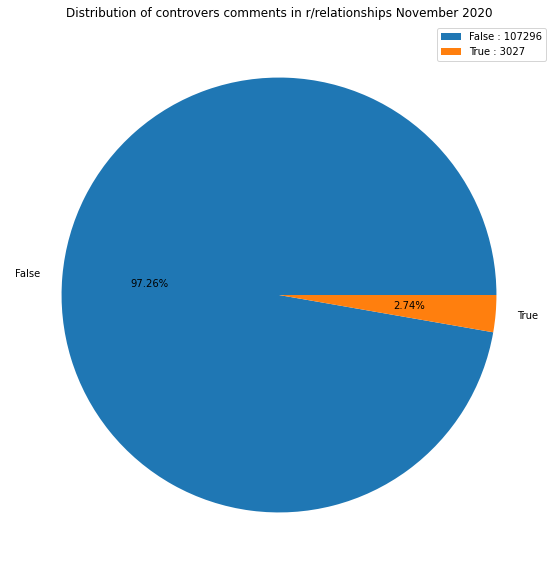

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df["controversiality"].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of controvers comments in r/relationships November 2020")
plt.ylabel('')  # Remove y-axis label for clarity

# How many submissions (link_id)

In [7]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 8012


# Which submission have the most interaction/comments

t3_jtlkte    814
t3_jyadrn    635
t3_jskugv    601
t3_k3jdcr    507
t3_jq5f59    495
            ... 
t3_ju6t77      1
t3_ju9r0j      1
t3_ju9sjh      1
t3_k1vgad      1
t3_k48ory      1
Name: link_id, Length: 8012, dtype: int64


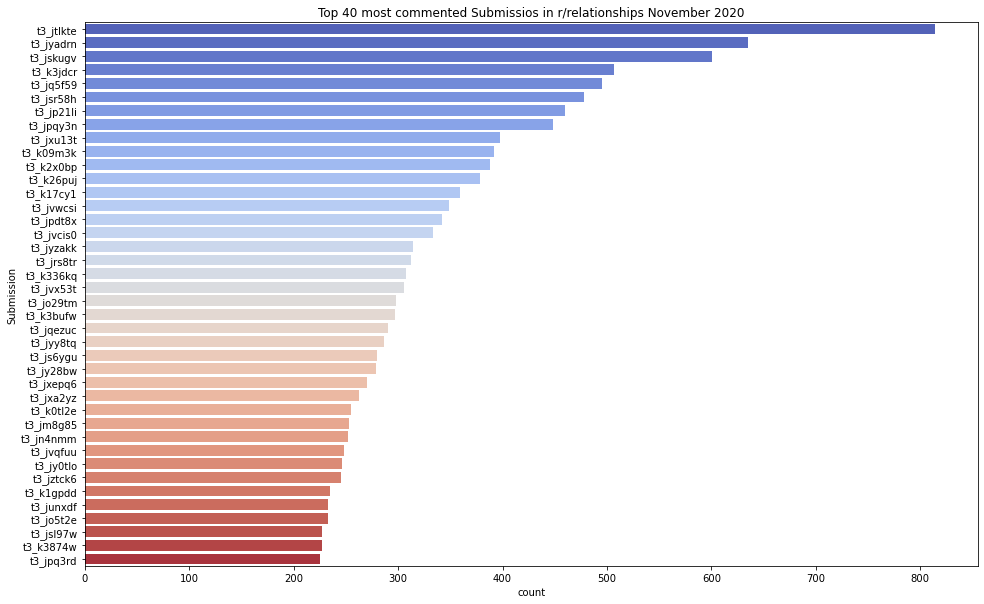

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)

# Ändere die Beschriftung von "link_id" zu "Submission"
plt.ylabel("Submission")
plt.title("Top 40 most commented Submissios in r/relationships November 2020")

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())


t3_jtlkte    814
t3_jyadrn    635
t3_jskugv    601
t3_k3jdcr    507
t3_jq5f59    495
            ... 
t3_ju6t77      1
t3_ju9r0j      1
t3_ju9sjh      1
t3_k1vgad      1
t3_k48ory      1
Name: link_id, Length: 8012, dtype: int64


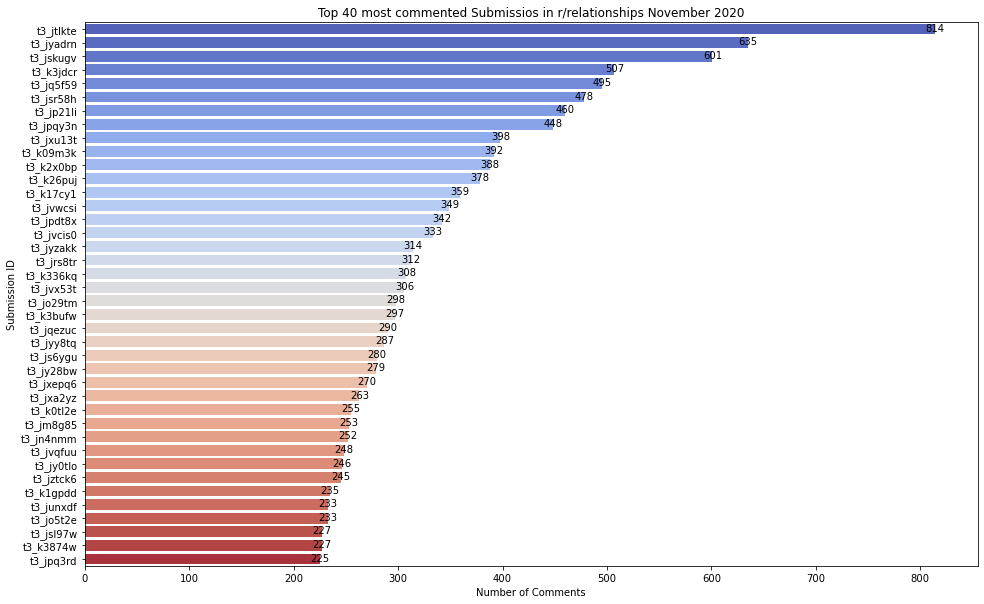

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index, ax=ax)

# Ändere die Beschriftung von "link_id" zu "Submission"
ax.set_ylabel("Submission ID")
ax.set_xlabel("Number of Comments")
plt.title("Top 40 most commented Submissios in r/relationships November 2020")

# Anzeige der Anzahl in den Bars
for p in ax.patches:
    ax.text(p.get_width() + 0.1, p.get_y() + p.get_height() / 2 - 0.1, 
            f'{int(p.get_width())}', ha='center', va='center')

# Drucke die Wertezählungen für die neue Beschriftung
print(df["link_id"].value_counts())







# Average number of Comments per Submission per day

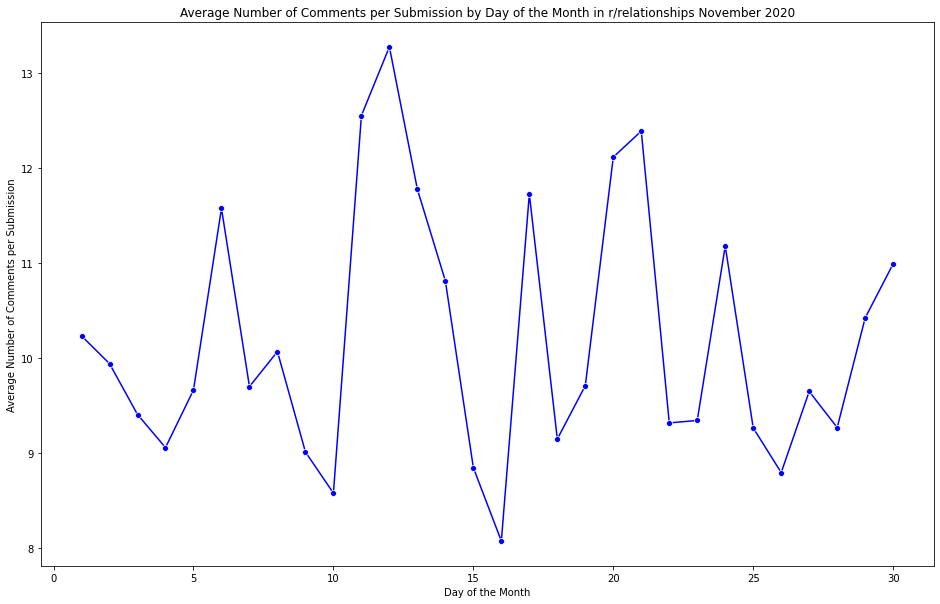

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each day
avg_comments_per_link_id = df.groupby(['created_day', 'link_id']).size().groupby('created_day').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id, x='created_day', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Day of the Month in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Average number of Comments per Submission per h

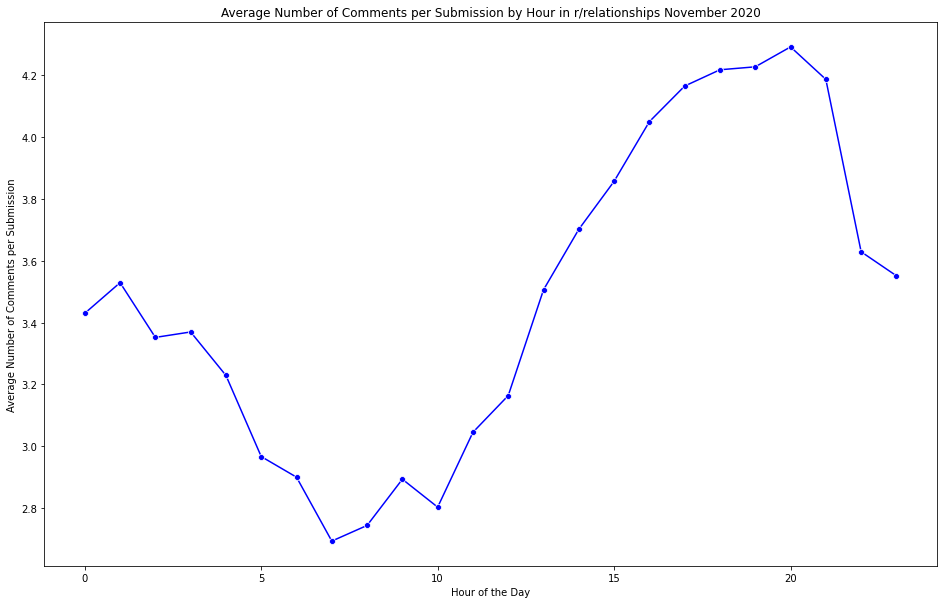

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per link_id for each hour
avg_comments_per_link_id_hourly = df.groupby(['created_hour', 'link_id']).size().groupby('created_hour').mean().reset_index(name='avg_comments')

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_link_id_hourly, x='created_hour', y='avg_comments', marker='o', color='blue')

plt.title('Average Number of Comments per Submission by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Submission')
plt.show()


# Author

# Who are the Authors/users with the most comments?

# With deleted

Text(0.5, 1.0, 'Top 20 users with the most comments in r/relationships November 2020')

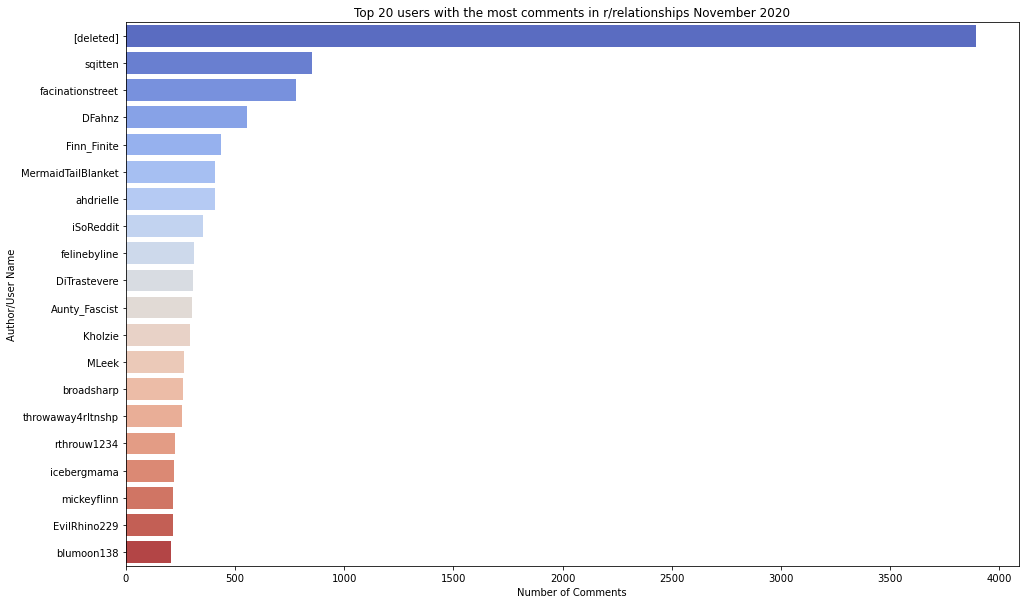

In [12]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)
plt.xlabel("Number of Comments")
plt.ylabel("Author/User Name")
plt.title("Top 20 users with the most comments in r/relationships November 2020")


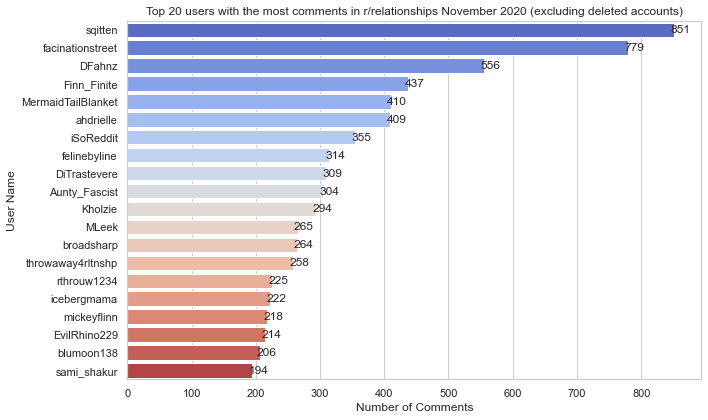

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("User Name")
plt.title("Top 20 users with the most comments in r/relationships November 2020 (excluding deleted accounts)")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [14]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 26916


In [15]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 13.77


In [16]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 4.10


# The average number of comments per author per hour

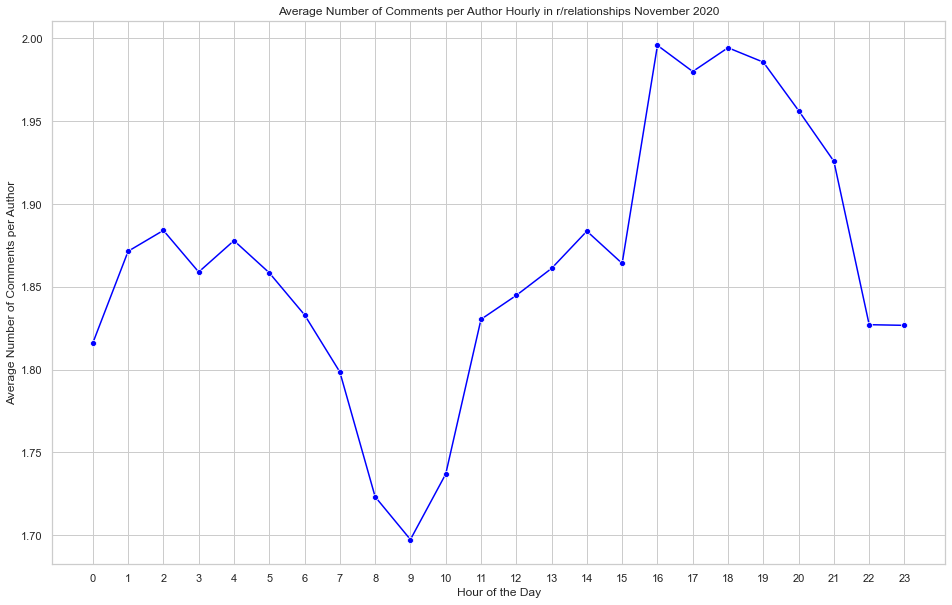

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each hour
avg_comments_per_author_hourly = df.groupby(['created_hour', 'author']).size().groupby('created_hour').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_hourly, x='created_hour', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Hourly in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(24))  # Show all hour values
plt.show()


# The average number of comments per author per day

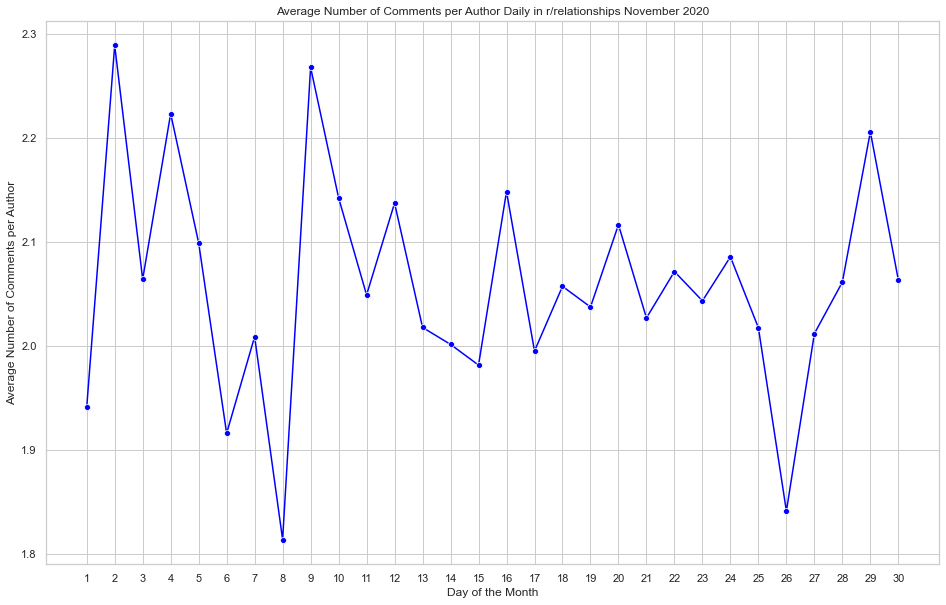

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Calculate the average number of comments per author for each day of the week
avg_comments_per_author_daily = df.groupby(['created_day', 'author']).size().groupby('created_day').mean().reset_index()

# Create the Line plot
fig = plt.figure(figsize=(16, 10))
sns.lineplot(data=avg_comments_per_author_daily, x='created_day', y=0, marker='o', color='blue')

plt.title('Average Number of Comments per Author Daily in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Average Number of Comments per Author')
plt.xticks(range(1, 31))  # Show all day values
plt.show()


# Number of comments per hour

([<matplotlib.axis.XTick at 0x7f8133ab0100>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

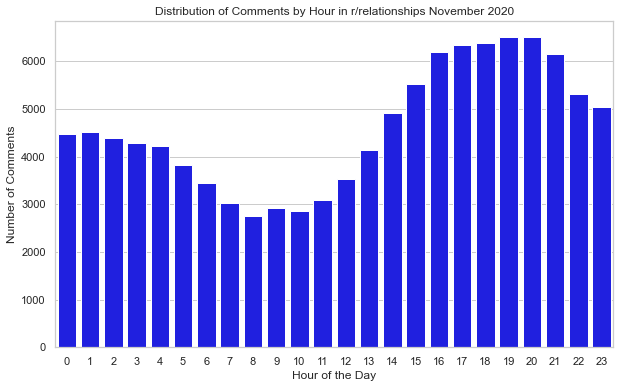

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column
# df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Create the Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Distribution of Comments by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Comments')
plt.xticks(range(24))  # Set x-axis to hours


# Number of comments per day

Text(0, 0.5, 'Number of Comments')

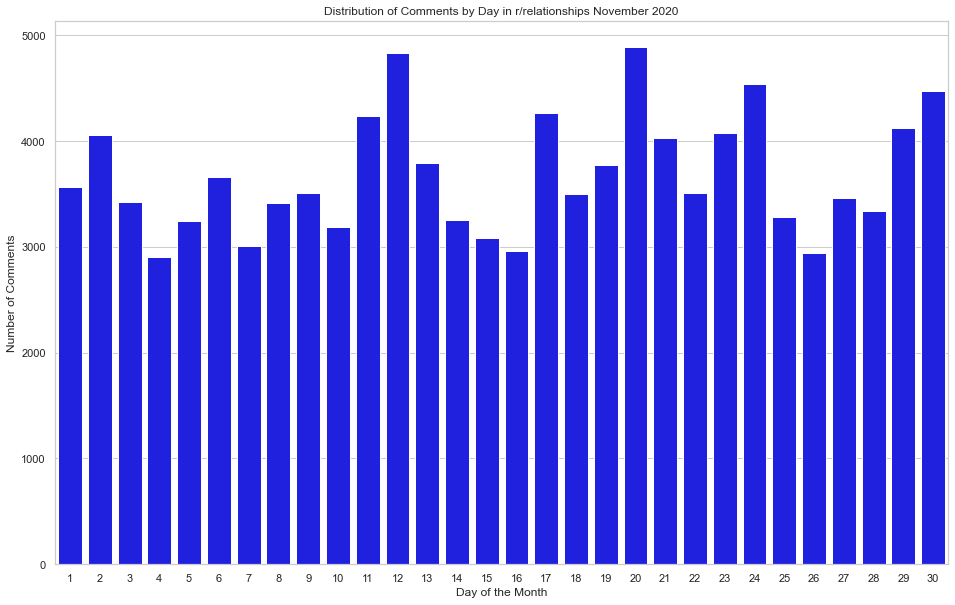

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already loaded the DataFrame "comments_new"

# Extract the hours from the "created_utc" column

# Create the Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Distribution of Comments by Day in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Comments')


# How many comments are Edited

In [21]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    107034
True       3289
Name: edited, dtype: int64


Text(0, 0.5, '')

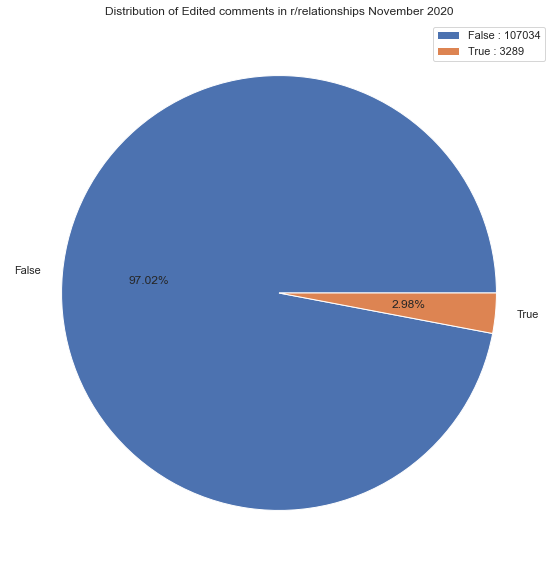

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 10))

# Plot Pie chart
pie_chart = df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%', legend=False)

# Get counts for each category
value_counts = df['edited'].value_counts()

# Create a custom legend with counts
legend_labels = [f'{value} : {count}' for value, count in zip(value_counts.index, value_counts)]
ax.legend(legend_labels, loc="upper right")

# Print the value counts
print(value_counts)

plt.title("Distribution of Edited comments in r/relationships November 2020")
plt.ylabel('')  # Remove y-axis label for clarity


# Score Analysis

In [23]:
df["score"].mean()

14.032649583495735

In [24]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
74773       Trippygirl13  0.198701         0.003586   0.044418   
87609   GoldendoodlesFTW  0.045626         0.001678   0.020032   
24464        False-Guess  0.061840         0.001783   0.026864   
45531        0biterdicta  0.058985         0.002174   0.026591   
97342         Befub14435  0.282002         0.016384   0.209164   
26246    stabbitytuesday  0.156562         0.004921   0.068967   
79372  i_saw_seven_birds  0.568186         0.025143   0.708646   
8292          kinkajou38  0.154903         0.003300   0.034898   
20459  unconsciouslyokay  0.414456         0.023077   0.394096   
74471         broadsharp  0.114090         0.002337   0.023585   

       Identity Attack    Insult    Threat  \
74773         0.006697  0.132458  0.006965   
87609         0.004921  0.017089  0.008868   
24464         0.005291  0.025800  0.006803   
45531         0.004884  0.023867  0.009981   
97342         0.033012  0.119787  0.015602   
26246         0.013848  0.073651  0.013876   
79372         0.019073  0.269578  0.010007   
8292          0.003829  0.072067  0.009101   
20459         0.081701  0.345482  0.011975   
74471         0.004458  0.049692  0.007573   

                                                    body  controversiality  \
74773  You don't negotiate boundaries, you decide wha...             False   
87609  I’m trying to reduce stress for her as much as...             False   
24464  I think it's a bad sign that he's talking like...             False   
45531  Tell him you're getting it done because it'll ...             False   
97342  I'd tell your gf because things were so awkwar...             False   
26246  You can't force your husband to get back in to...             False   
79372  “ The reason why he didn't get me a birthday p...             False   
8292   You cannot buy silence, you can only rent it. ...             False   
20459  Honestly it sounds like they have no clue you ...             False   
74471  Uh, your brother is way out of line. You don't...             False   

               created_utc  ...    link_id  parent_id score created_hour  \
74773  2020-11-21 15:08:00  ...  t3_jyadrn  t3_jyadrn  7240           15   
87609  2020-11-24 19:16:44  ...  t3_k09m3k  t3_k09m3k  5860           19   
24464  2020-11-08 05:22:21  ...  t3_jq5f59  t3_jq5f59  5573            5   
45531  2020-11-13 18:54:03  ...  t3_jtlkte  t3_jtlkte  5312           18   
97342  2020-11-27 18:47:26  ...  t3_k26puj  t3_k26puj  5227           18   
26246  2020-11-08 17:22:40  ...  t3_jqezuc  t3_jqezuc  5150           17   
79372  2020-11-22 20:15:49  ...  t3_jyy8tq  t3_jyy8tq  4995           20   
8292   2020-11-03 05:36:35  ...  t3_jn4nmm  t3_jn4nmm  4716            5   
20459  2020-11-06 21:48:29  ...  t3_jpdt8x  t3_jpdt8x  4369           21   
74471  2020-11-21 13:17:06  ...  t3_jyadrn  t3_jyadrn  4301           13   

      created_day  created_year  \
74773          21          2020   
87609          24          2020   
24464           8          2020   
45531          13          2020   
97342          27          2020   
26246           8          2020   
79372          22          2020   
8292            3          2020   
20459           6          2020   
74471          21          2020   

                                              clean_text  comment_len  \
74773  You don t negotiate boundaries you decide what...          116   
87609  I m trying to reduce stress for her as much as...           82   
24464  I think it s a bad sign that he s talking like...          102   
45531  Tell him you re getting it done because it ll ...          130   
97342  I d tell your gf because things were so awkwar...          148   
26246  You can t force your husband to get back in to...          182   
79372  The reason why he didn t get me a birthday pre...           47   
8292   You can not buy silence you can only rent it ....          105   
20459  Honestly it sounds like they have no c

In [25]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

author  Toxicity  Severe Toxicity  Profanity  \
74834   curiouscarladog  0.686364         0.169603   0.600193   
64903  BroadyBroadhurst  0.166786         0.003624   0.089693   
3474          SirM0rgan  0.377512         0.023077   0.226230   
24987     Barackenpapst  0.055274         0.001335   0.015455   
50938          Loltimex  0.041915         0.002298   0.022628   
43195          loki0111  0.097420         0.003777   0.079672   
69283  Gonebabythoughts  0.284252         0.010681   0.219973   
88335          colcrnch  0.011938         0.000958   0.012995   
72652      ThrowRA29981  0.026617         0.001197   0.023311   
72664      ThrowRA29981  0.020607         0.001078   0.015216   

       Identity Attack    Insult    Threat  \
74834         0.040230  0.567870  0.015084   
64903         0.010137  0.082866  0.007016   
3474          0.057947  0.245617  0.348893   
24987         0.027816  0.018968  0.006259   
50938         0.006253  0.012719  0.008997   
43195         0.018169  0.028061  0.009101   
69283         0.010063  0.053791  0.008492   
88335         0.003533  0.007741  0.006887   
72652         0.004551  0.011009  0.006719   
72664         0.002312  0.008178  0.008091   

                                                    body  controversiality  \
74834  That is a fake story- no-one even acts this sh...             False   
64903  Is this honestly a serious suggestion. Op is d...             False   
3474   Oh you're right there's only one possible expl...             False   
24987  This is a slogan I never understood. In the en...             False   
50938                            ehm controlling bodies?             False   
43195  As a guy, generally after 30 we get settled in...             False   
69283  I think you can, though. Maybe in a slightly b...             False   
88335                           They are her family too.             False   
72652  He didn't want to stay with us instead. This w...             False   
72664    It's not like she told him to/made him do that.             False   

               created_utc  ...    link_id   parent_id score created_hour  \
74834  2020-11-21 15:21:56  ...  t3_jyadrn  t1_gd20j62  -280           15   
64903  2020-11-19 09:13:08  ...  t3_jwy2lw  t1_gct4fq3  -195            9   
3474   2020-11-01 23:41:10  ...  t3_jmaxue  t1_gaucfzc  -183           23   
24987  2020-11-08 09:26:43  ...  t3_jq5f59  t1_gbkkqnc  -139            9   
50938  2020-11-15 08:32:11  ...  t3_jug4ao  t1_gcd1la2  -131            8   
43195  2020-11-13 01:18:19  ...  t3_jt53qu  t1_gc3t7pq  -127            1   
69283  2020-11-20 11:32:54  ...  t3_jxn9gl  t1_gcxk9b4  -124           11   
88335  2020-11-24 22:10:31  ...  t3_k09m3k  t1_gdhep31  -122           22   
72652  2020-11-21 00:31:42  ...  t3_jy0f5s  t1_gczxklj  -116            0   
72664  2020-11-21 00:34:47  ...  t3_jy0f5s  t1_gczxu2p  -110            0   

      created_day  created_year  \
74834          21          2020   
64903          19          2020   
3474            1          2020   
24987           8          2020   
50938          15          2020   
43195          13          2020   
69283          20          2020   
88335          24          2020   
72652          21          2020   
72664          21          2020   

                                              clean_text  comment_len  \
74834  That is a fake story no one even acts this shi...           42   
64903  Is this honestly a serious suggestion . Op is ...           37   
3474   Oh you re right there s only one possible expl...           52   
24987  This is a slogan I never understood . In the e...           55   
50938                             ehm controlling bodies            3   
43195  As a guy generally after we get settled in our...          133   
69283  I think you can though . Maybe in a slightly b...           79   
88335                          They are her family too .            6   
72652  He didn t want to stay with us instea

# On which hour the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

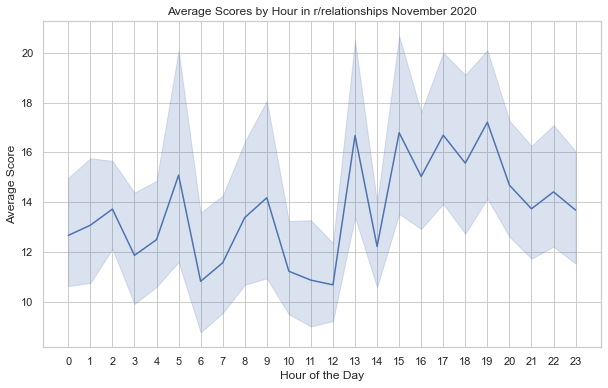

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')




([<matplotlib.axis.XTick at 0x7f8111b023a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

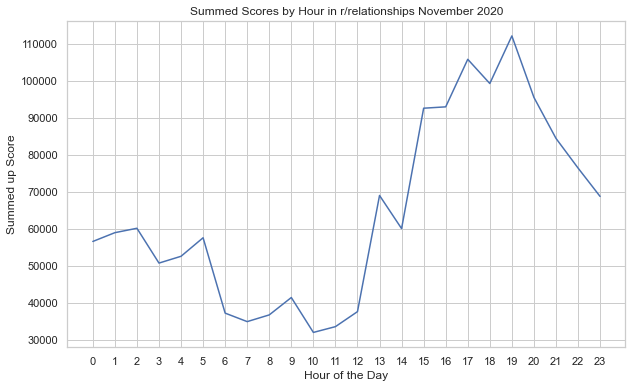

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="score")

plt.title('Summed Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Score')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an



# On which day the scores are the highes or lowest

Text(0, 0.5, 'Average Score')

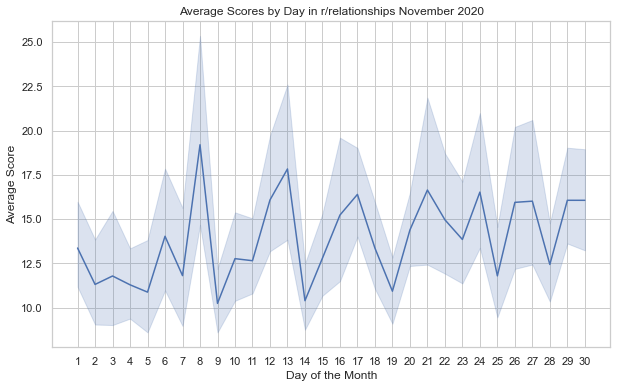

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))

# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

([<matplotlib.axis.XTick at 0x7f80f0277fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

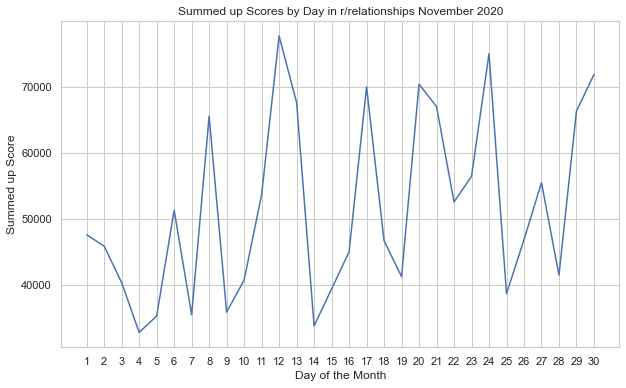

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")["score"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="score")

plt.title('Summed up Scores by Day in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# Which Author have the most scores

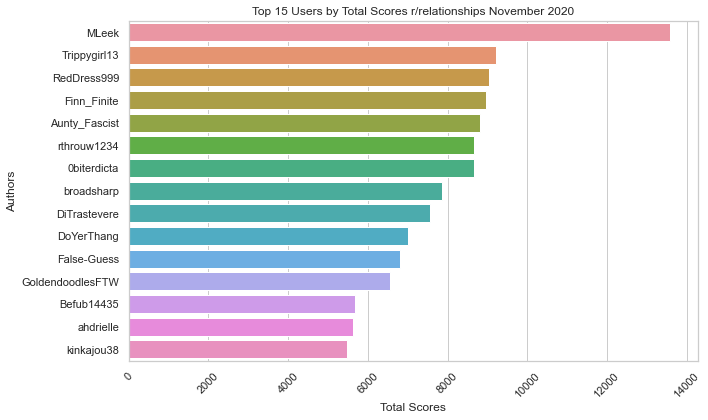

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_df is your DataFrame with the corresponding columns
# Make sure to use the same DataFrame name

# Group authors by total scores
author_scores = df.groupby('author')['score'].sum()

# Sort authors by total scores in descending order
sorted_authors = author_scores.sort_values(ascending=False)

# Remove the first author from the sorted list
sorted_authors = sorted_authors.iloc[2:]

# Select the top 15 authors
top_authors = sorted_authors.head(15)

# Create a plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Users by Total Scores r/relationships November 2020')
plt.xlabel("Total Scores")
plt.ylabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()


# Sind Leute die mehr Edited mehr negative?

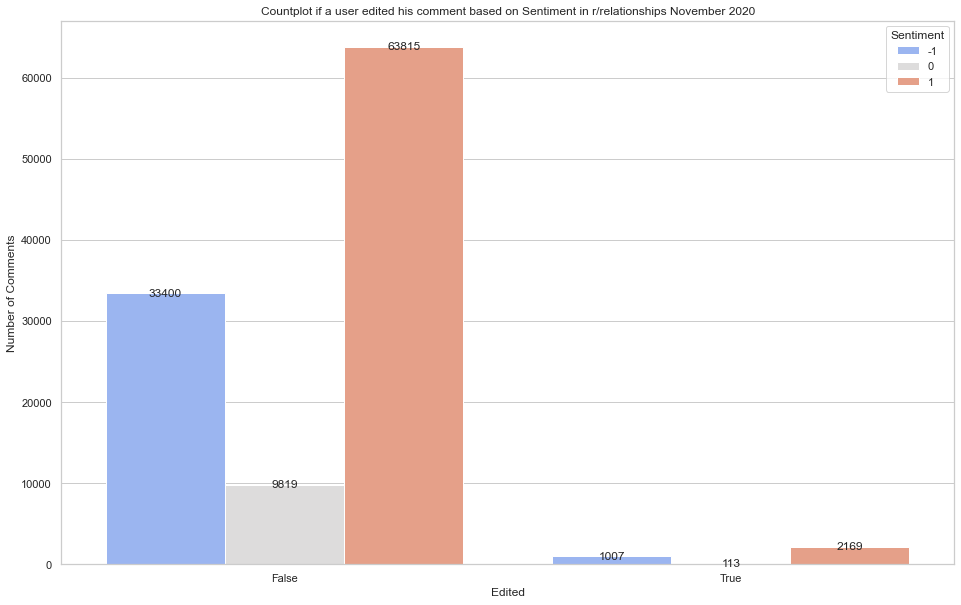

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='edited', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if a user edited his comment based on Sentiment in r/relationships November 2020')
plt.xlabel('Edited')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

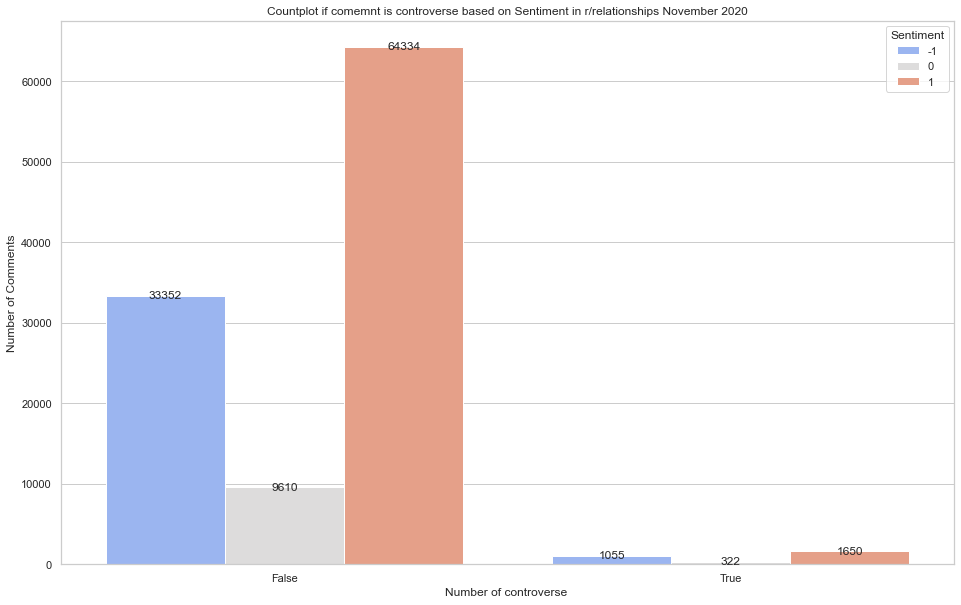

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 10))

# Count the values and create a bar plot
sns.countplot(data=df, x='controversiality', palette='coolwarm', ax=ax,hue="Sentiment")

# Add labels
plt.title('Countplot if comemnt is controverse based on Sentiment in r/relationships November 2020')
plt.xlabel('Number of controverse ')
plt.ylabel('Number of Comments')

# Display the count above the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1,
            f'{int(p.get_height())}', ha='center', va='center')

# Sentiment  Analyses

# Durchschnittliche Vader Sentiment score für 2020

In [33]:
df["compound"].mean()

0.2246099852252057

# Vader Sentiment coutplot

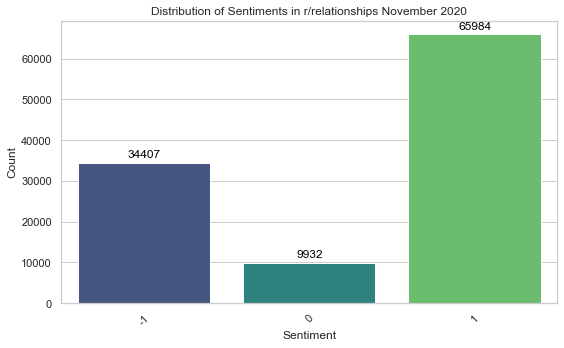

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Create the Countplot for Sentiments
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribution of Sentiments in r/relationships November 2020')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add the count above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()


# Prozentuale Verteilung von Vader Sentiment

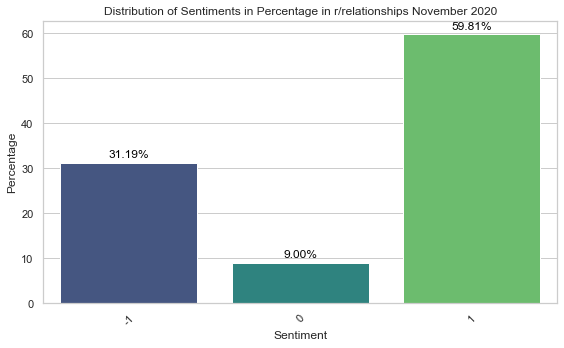

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the 'Sentiment' column has already been created as described in the previous code.

# Calculate the percentage for each sentiment
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100

# Create the bar plot for Sentiments in percentage
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiments in Percentage in r/relationships November 2020')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Add the percentage above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()

# Verteilung des Compound scores

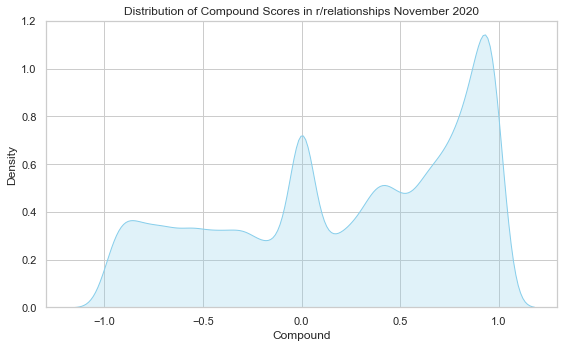

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot for the 'compound' column
plt.figure(figsize=(8, 5))
sns.kdeplot(df['compound'], shade=True, color='skyblue')
plt.title('Distribution of Compound Scores in r/relationships November 2020')
plt.xlabel('Compound')
plt.ylabel('Density')
plt.tight_layout()

# An welchen Tag sind die Kommentare durchschnittlich am negativsten bzw positivesten

([<matplotlib.axis.XTick at 0x7f81029e5190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

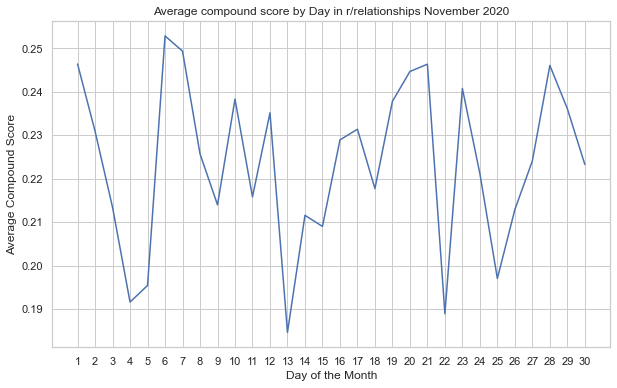

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_day")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_day", y="compound")

plt.title('Average compound score by Day in r/relationships November 2020')
plt.xlabel('Day of the Month')
plt.ylabel('Average Compound Score')
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

# An welcher stunde sind die Kommentare im durchschnitt am negativsten oder positivsten

([<matplotlib.axis.XTick at 0x7f8121f187f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

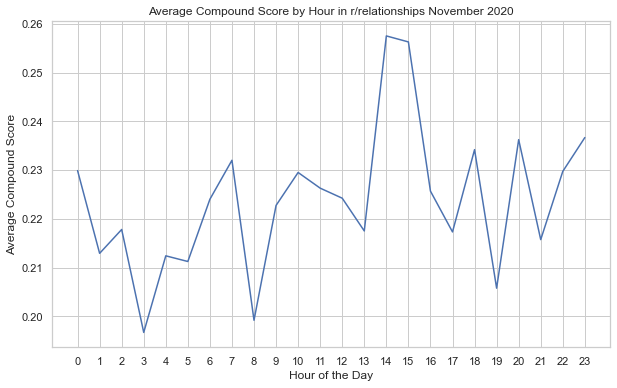

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")['compound'].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="compound")

plt.title('Average Compound Score by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel("Average Compound Score")
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

# Zu welcher Zeit haben negative, positive und neutrale kommentare im Durchschnitt den höchsten scoren

Text(0, 0.5, 'Average Score')

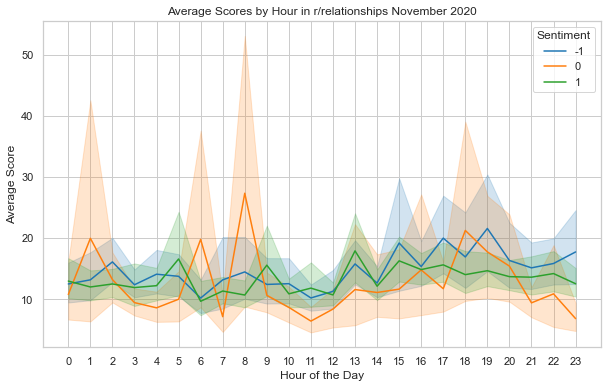

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Score')

Text(0, 0.5, 'Average Score')

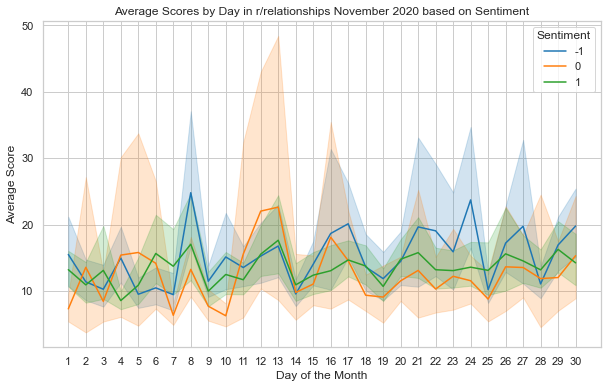

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')


Text(0, 0.5, 'Average Score')

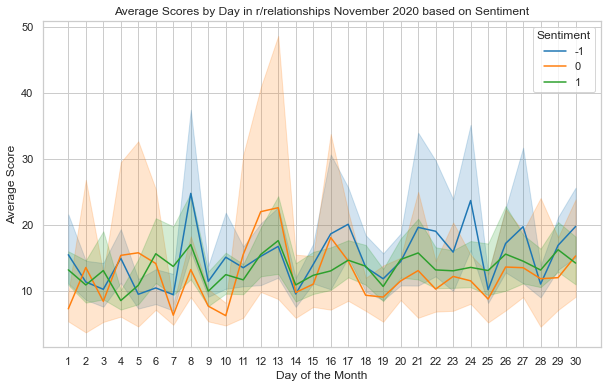

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="score",hue="Sentiment",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Score')

Text(0, 0.5, 'Summed up Score')

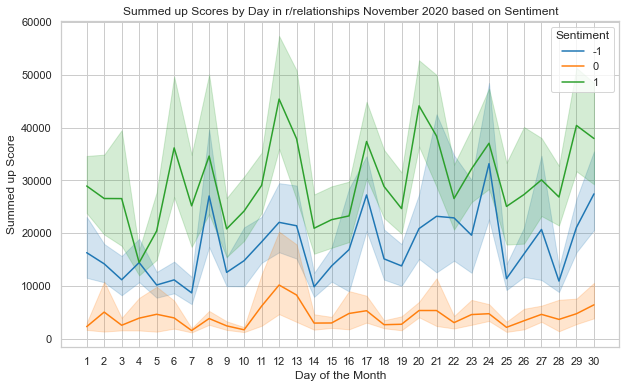

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="score", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up Scores by Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Score')

<AxesSubplot:xlabel='Sentiment', ylabel='score'>

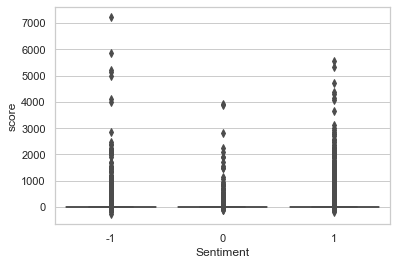

In [43]:
sns.boxplot(data=df, y="score", x="Sentiment")

<AxesSubplot:xlabel='Sentiment', ylabel='comment_len'>

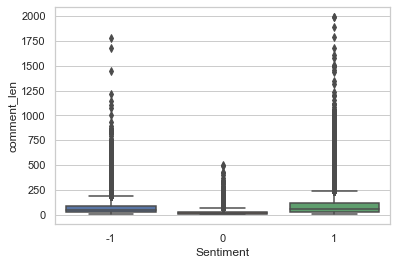

In [44]:
sns.boxplot(data=df, y="comment_len", x="Sentiment")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            110323 non-null  object 
 1   Toxicity          109832 non-null  float64
 2   Severe Toxicity   109832 non-null  float64
 3   Profanity         109832 non-null  float64
 4   Identity Attack   109832 non-null  float64
 5   Insult            109832 non-null  float64
 6   Threat            109832 non-null  float64
 7   body              110323 non-null  object 
 8   controversiality  110323 non-null  bool   
 9   created_utc       110323 non-null  object 
 10  edited            110323 non-null  bool   
 11  gilded            110323 non-null  int64  
 12  id                110323 non-null  object 
 13  link_id           110323 non-null  object 
 14  parent_id         110323 non-null  object 
 15  score             110323 non-null  int64  
 16  created_hour      11

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            110323 non-null  object 
 1   Toxicity          109832 non-null  float64
 2   Severe Toxicity   109832 non-null  float64
 3   Profanity         109832 non-null  float64
 4   Identity Attack   109832 non-null  float64
 5   Insult            109832 non-null  float64
 6   Threat            109832 non-null  float64
 7   body              110323 non-null  object 
 8   controversiality  110323 non-null  bool   
 9   created_utc       110323 non-null  object 
 10  edited            110323 non-null  bool   
 11  gilded            110323 non-null  int64  
 12  id                110323 non-null  object 
 13  link_id           110323 non-null  object 
 14  parent_id         110323 non-null  object 
 15  score             110323 non-null  int64  
 16  created_hour      11

# Comment lengt

In [47]:
df["comment_len"].mean()

77.19888871767446

In [48]:
df["comment_len"].median()

51.0

([<matplotlib.axis.XTick at 0x7f80d0202790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

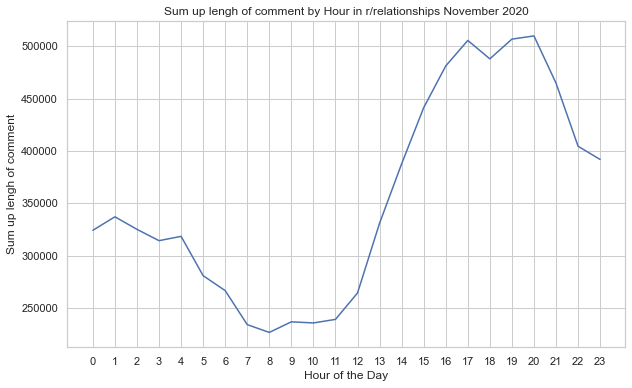

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].sum().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Sum up lengh of comment by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Sum up lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

([<matplotlib.axis.XTick at 0x7f8122bf68b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

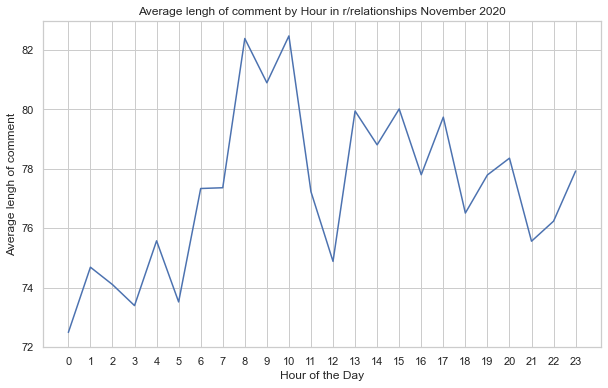

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DataFrame df contains columns "created_hour" and "score"

# Group by "created_hour" and calculate the sum for each hour
hourly_sum = df.groupby("created_hour")["comment_len"].mean().reset_index()

# Create a line plot for the sum values
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_sum, x="created_hour", y="comment_len")

plt.title('Average lengh of comment by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average lengh of comment')
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

Text(0, 0.5, 'Average Comment Length')

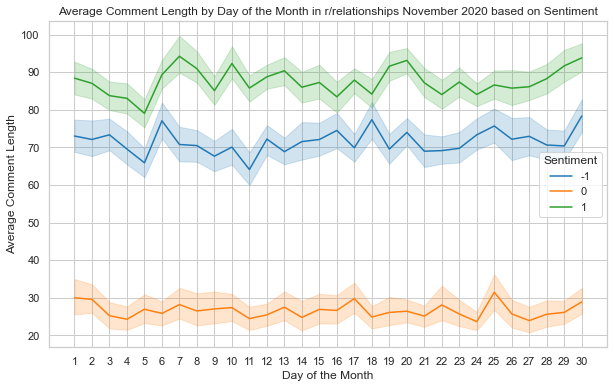

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all day values

plt.title('Average Comment Length by Day of the Month in r/relationships November 2020 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Average Comment Length')



Text(0, 0.5, 'Average Comment Length')

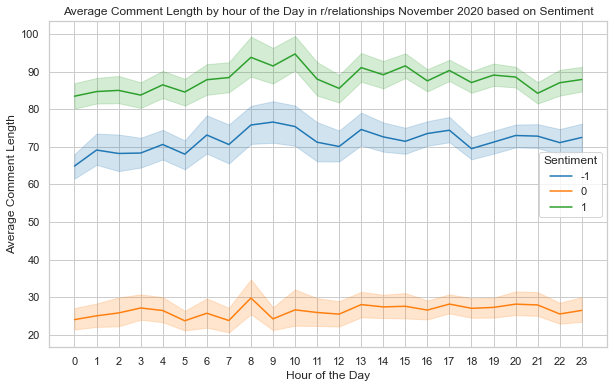

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart for comment length
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all day values

plt.title('Average Comment Length by hour of the Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Comment Length')

Text(0, 0.5, 'Summed up Comment length')

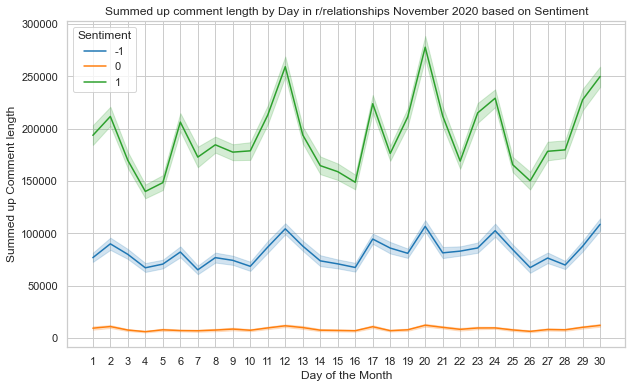

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_day", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Show all hour values

plt.title('Summed up comment length by Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Day of the Month')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

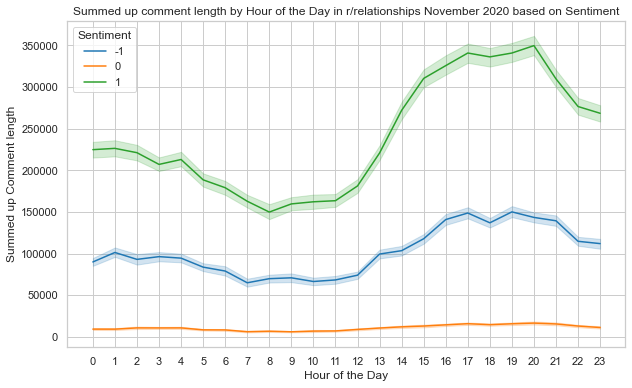

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment length by Hour of the Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

Text(0, 0.5, 'Summed up Comment length')

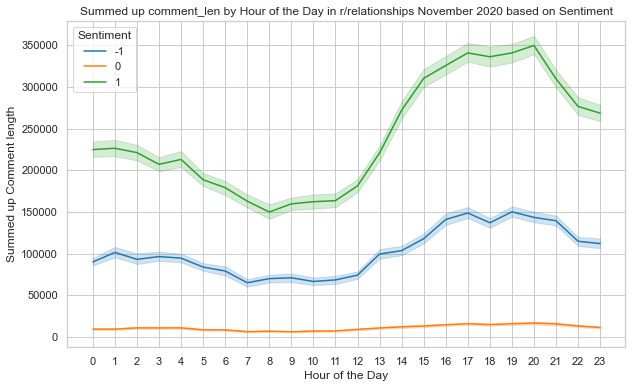

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the appearance to "whitegrid" or "white" for a background without grid lines
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line chart and use the "sum" function for the Y-axis
sns.lineplot(data=df, x="created_hour", y="comment_len", hue="Sentiment", palette="tab10", estimator=sum)

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Show all hour values

plt.title('Summed up comment_len by Hour of the Day in r/relationships November 2020 based on Sentiment')
plt.xlabel('Hour of the Day')
plt.ylabel('Summed up Comment length')

# Toxicity 

In [56]:
import pandas as pd

# Annahme: DataFrame df enthält die Spalten "comment_len", "compound" und "Toxicity"

# Filtere die Zeilen, in denen "Toxicity" keinen Wert hat
filtered_df = df[df['Toxicity'].isnull()]

# Berechne den Durchschnitt von "comment_len" und "compound" für die gefilterten Zeilen
mean_comment_len = filtered_df['comment_len'].mean()
mean_compound_score = filtered_df['compound'].mean()

print(f'Mean Comment Length (where Toxicity is null): {mean_comment_len}')
print(f'Mean Compound Score (where Toxicity is null): {mean_compound_score}')


Mean Comment Length (where Toxicity is null): 6.276985743380855
Mean Compound Score (where Toxicity is null): 0.15960488798370634


Text(0, 0.5, 'Count')

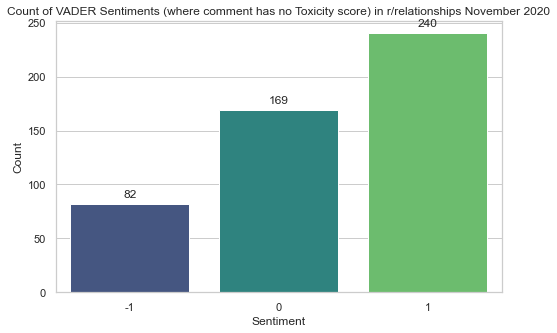

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "sentiment"

# Erstelle das Countplot für die Spalte "sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den genauen Zahlen
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Count of VADER Sentiments (where comment has no Toxicity score) in r/relationships November 2020')
plt.xlabel('Sentiment')
plt.ylabel('Count')





Text(0, 0.5, 'Percentage')

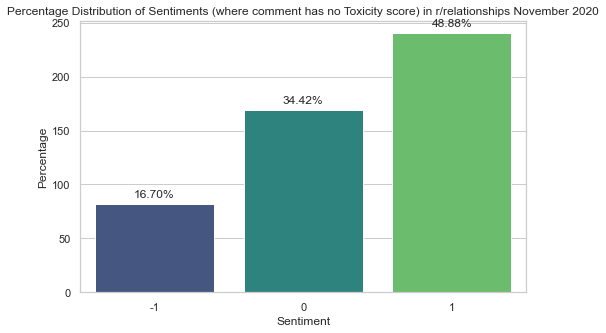

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: filtered_df ist dein gefiltertes DataFrame mit der Spalte "Sentiment"

# Berechne die prozentualen Anteile für jeden Sentiment-Wert
total_count = len(filtered_df)
percentages = (filtered_df['Sentiment'].value_counts() / total_count) * 100

# Erstelle das Countplot für die Spalte "Sentiment"
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=filtered_df, x='Sentiment', palette='viridis')

# Beschrifte die Balken mit den prozentualen Anteilen
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height / total_count * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Percentage Distribution of Sentiments (where comment has no Toxicity score) in r/relationships November 2020')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')




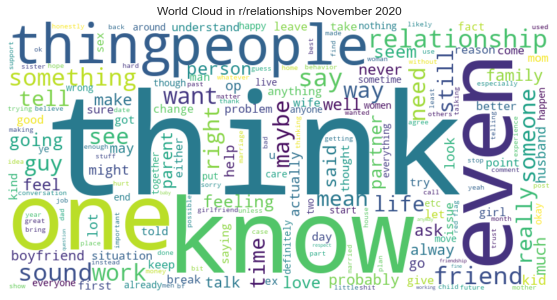

Text(0, 0.5, 'Count')

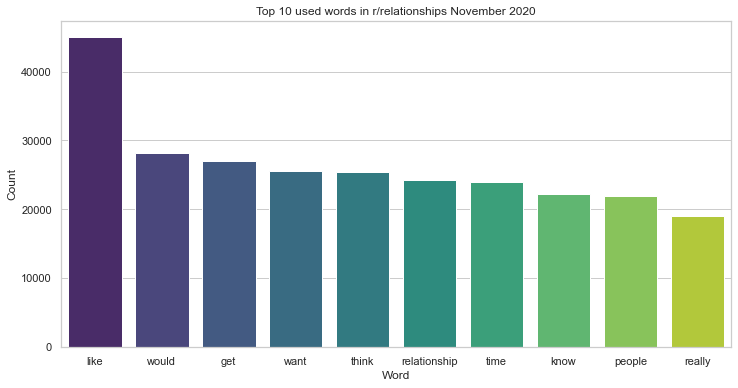

In [59]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import seaborn as sns

# Assuming you already have a DataFrame named "df" with a column named "body"
# Make sure that nltk, wordcloud, seaborn, and matplotlib are installed
# Install them with: pip install nltk wordcloud seaborn matplotlib

# Load English stopwords
stop_words = set(stopwords.words("english"))

# Combine all texts in the "body" column into a single text and remove stopwords
df["body_clean"] = df["clean_text"].apply(lambda x: " ".join([word.lower() for word in word_tokenize(str(x)) if word.isalpha() and word.lower() not in stop_words]))

# Combine all cleaned texts into a single text
text = " ".join(df["body_clean"])

# Create the Word Cloud using the WordCloud library
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.title("World Cloud in r/relationships November 2020")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Create a Countplot for the Top 10 words
top_words = Counter(text.split()).most_common(10)
top_words_df = pd.DataFrame(top_words, columns=["Word", "Count"])

plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Count", data=top_words_df, palette="viridis")
plt.title("Top 10 used words in r/relationships November 2020")
plt.xlabel("Word")
plt.ylabel("Count")



# Toxicity Analyses

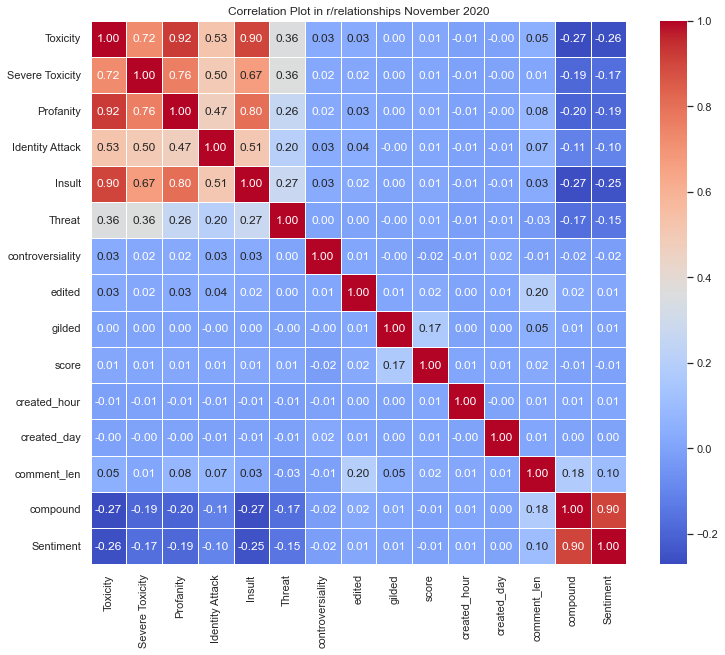

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Annahme: df ist dein DataFrame

# Entferne die Spalten created_year, created_hour, und created_day
columns_to_exclude = ['created_year']
df_filtered = df.drop(columns=columns_to_exclude, errors='ignore')

# Berechne die Korrelationsmatrix
correlation_matrix = df_filtered.corr()

# Erstelle den Korrelationsplot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Plot in r/relationships November 2020')
plt.show()

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   author            110323 non-null  object 
 1   Toxicity          109832 non-null  float64
 2   Severe Toxicity   109832 non-null  float64
 3   Profanity         109832 non-null  float64
 4   Identity Attack   109832 non-null  float64
 5   Insult            109832 non-null  float64
 6   Threat            109832 non-null  float64
 7   body              110323 non-null  object 
 8   controversiality  110323 non-null  bool   
 9   created_utc       110323 non-null  object 
 10  edited            110323 non-null  bool   
 11  gilded            110323 non-null  int64  
 12  id                110323 non-null  object 
 13  link_id           110323 non-null  object 
 14  parent_id         110323 non-null  object 
 15  score             110323 non-null  int64  
 16  created_hour      11

In [62]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
df['Toxicity_0.7_or_higher'] = (df['Toxicity'] >= 0.7).astype(int)
df['Severe_Toxicity_0.7_or_higher'] = (df['Severe Toxicity'] >= 0.7).astype(int)
df['Profanity_0.7_or_higher'] = (df['Profanity'] >= 0.7).astype(int)
df['Identity_Attack_0.7_or_higher'] = (df['Identity Attack'] >= 0.7).astype(int)
df['Insult_0.7_or_higher'] = (df['Insult'] >= 0.7).astype(int)
df['Threat_0.7_or_higher'] = (df['Threat'] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
count_toxicity = df['Toxicity_0.7_or_higher'].sum()
count_severe_toxicity = df['Severe_Toxicity_0.7_or_higher'].sum()
count_profanity = df['Profanity_0.7_or_higher'].sum()
count_identity_attack = df['Identity_Attack_0.7_or_higher'].sum()
count_insult = df['Insult_0.7_or_higher'].sum()
count_threat = df['Threat_0.7_or_higher'].sum()

# Drucke die Ergebnisse
print(f'Count of Toxicity >= 0.7: {count_toxicity}')
print(f'Count of Severe Toxicity >= 0.7: {count_severe_toxicity}')
print(f'Count of Profanity >= 0.7: {count_profanity}')
print(f'Count of Identity Attack >= 0.7: {count_identity_attack}')
print(f'Count of Insult >= 0.7: {count_insult}')
print(f'Count of Threat >= 0.7: {count_threat}')


Count of Toxicity >= 0.7: 3472
Count of Severe Toxicity >= 0.7: 7
Count of Profanity >= 0.7: 3246
Count of Identity Attack >= 0.7: 6
Count of Insult >= 0.7: 696
Count of Threat >= 0.7: 5


In [63]:
import pandas as pd

# Angenommen, df ist dein DataFrame
# Wähle die relevanten Spalten aus
selected_columns = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# Erstelle eine neue Spalte für jeden Wert >= 0.7 (1 für True, 0 für False)
for col in selected_columns:
    df[f'{col}_0.7_or_higher'] = (df[col] >= 0.7).astype(int)

# Summiere die Anzahl der 1en für jede Spalte
counts = df[[f'{col}_0.7_or_higher' for col in selected_columns]].sum()

# Berechne den Prozentsatz im Verhältnis zur Gesamtanzahl der Zeilen
total_rows = len(df)
percentages = counts / total_rows * 100

# Drucke die prozentualen Ergebnisse
for col, percentage in zip(selected_columns, percentages):
    print(f'Percentage of {col} >= 0.7: {percentage:.3f}%')


Percentage of Toxicity >= 0.7: 3.147%
Percentage of Severe Toxicity >= 0.7: 0.006%
Percentage of Profanity >= 0.7: 2.942%
Percentage of Identity Attack >= 0.7: 0.005%
Percentage of Insult >= 0.7: 0.631%
Percentage of Threat >= 0.7: 0.005%


Text(0, 0.5, 'Average Toxicity Score')

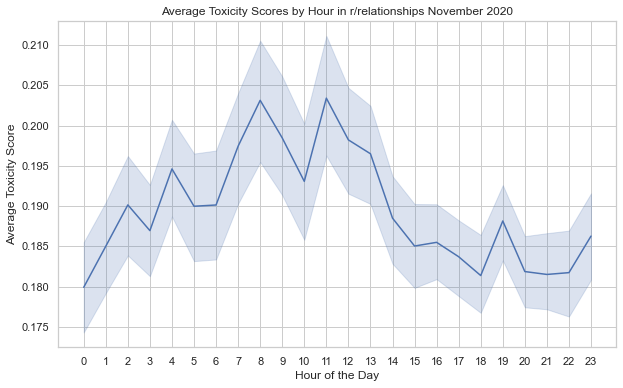

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Toxicity Score')

Text(0, 0.5, 'Average Toxicity Score')

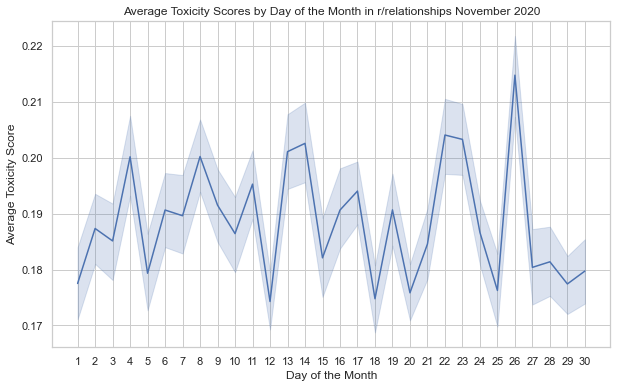

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Toxicity Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Toxicity Score')

# Severe Toxicity

Text(0, 0.5, 'Average Severe Toxicity Score')

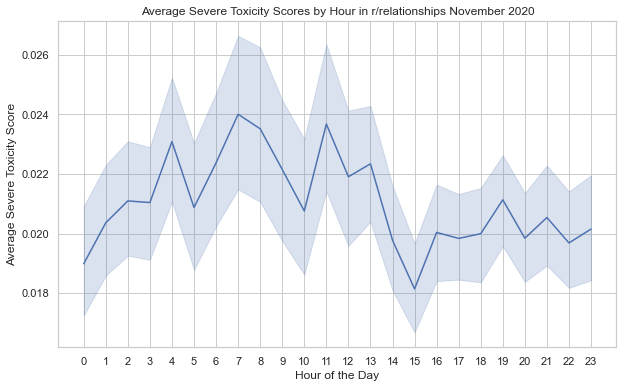

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Severe Toxicity Score')

Text(0, 0.5, 'Average Severe Toxicity Score')

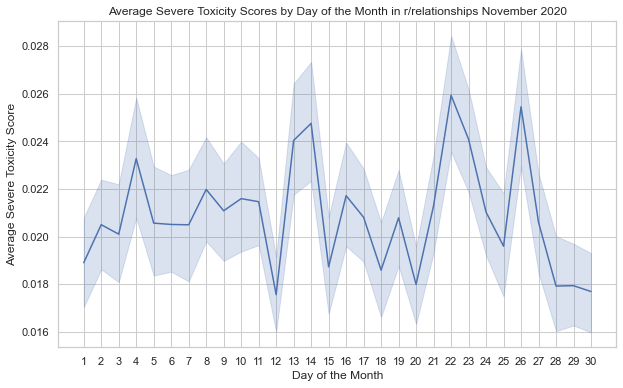

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Severe Toxicity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Severe Toxicity Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Severe Toxicity Score')

# Profanity

Text(0, 0.5, 'Average Profanity Score')

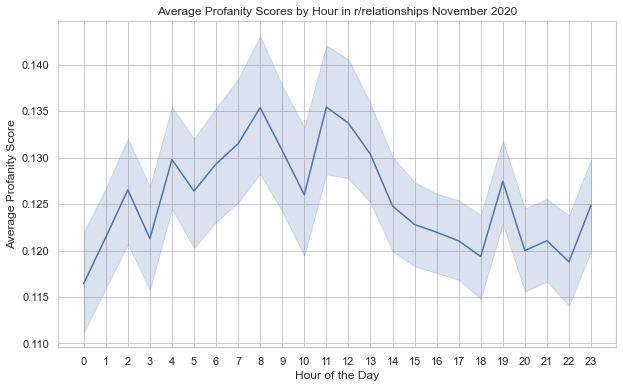

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Profanity Score')

Text(0, 0.5, 'Average Profanity Score')

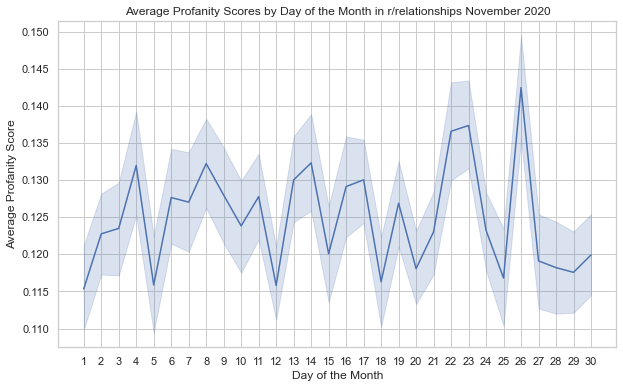

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Profanity",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Profanity Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Profanity Score')

# Identity Attack

Text(0, 0.5, 'Average Identity Attack Score')

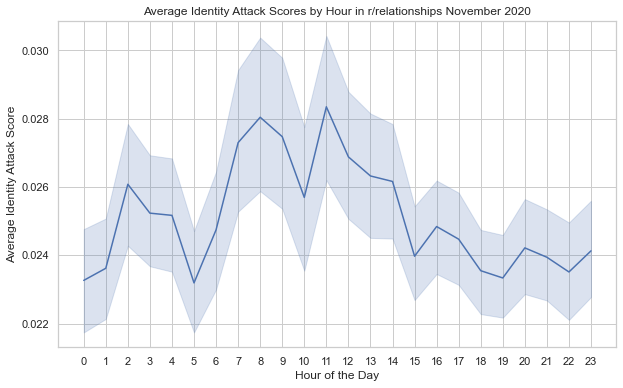

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Identity Attack Score')

Text(0, 0.5, 'Average Identity Attack Score')

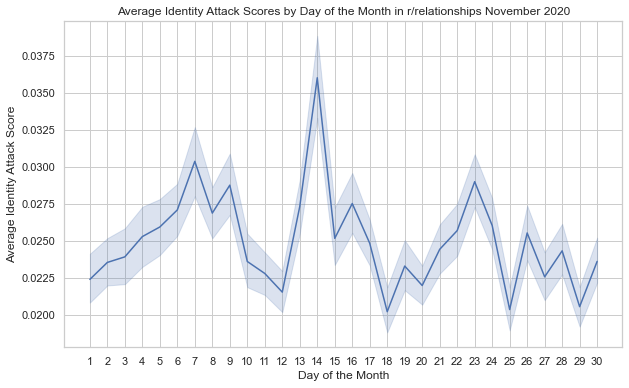

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Identity Attack",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Identity Attack Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Identity Attack Score')

# Insult

Text(0, 0.5, 'Average Insult Score')

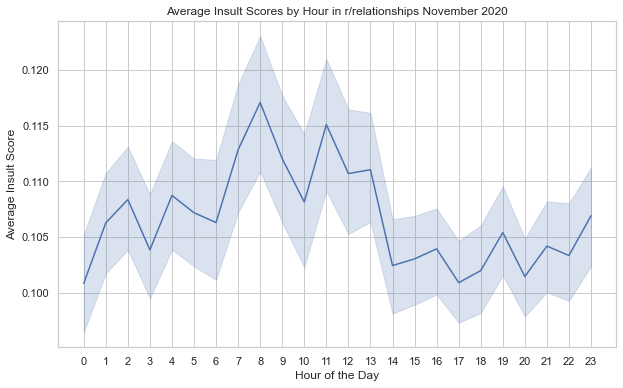

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Insult Score')

Text(0, 0.5, 'Average Insult Score')

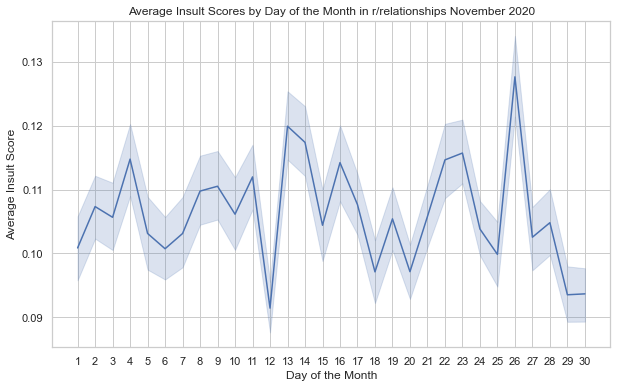

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Insult",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Insult Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Insult Score')

# Threat

Text(0, 0.5, 'Average Threat Score')

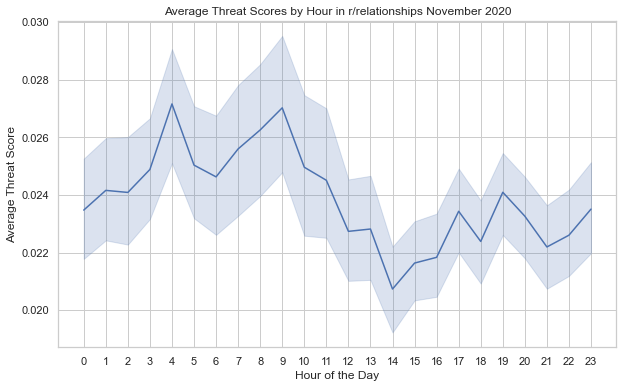

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_hour", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Hour in r/relationships November 2020')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Threat Score')

Text(0, 0.5, 'Average Threat Score')

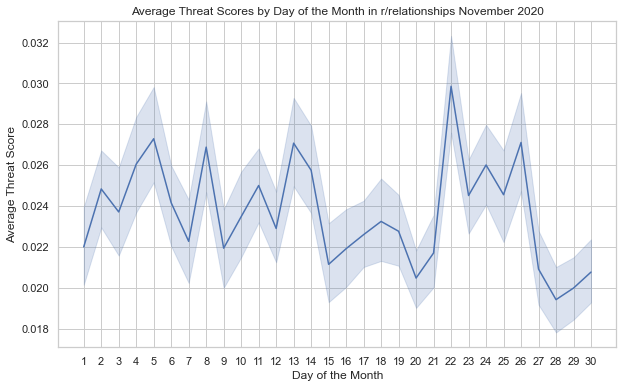

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10, 6))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]
# Plot Line chart
sns.lineplot(data=df, x="created_day", y="Threat",palette="tab10")

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Threat Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Threat Score')

# Summary

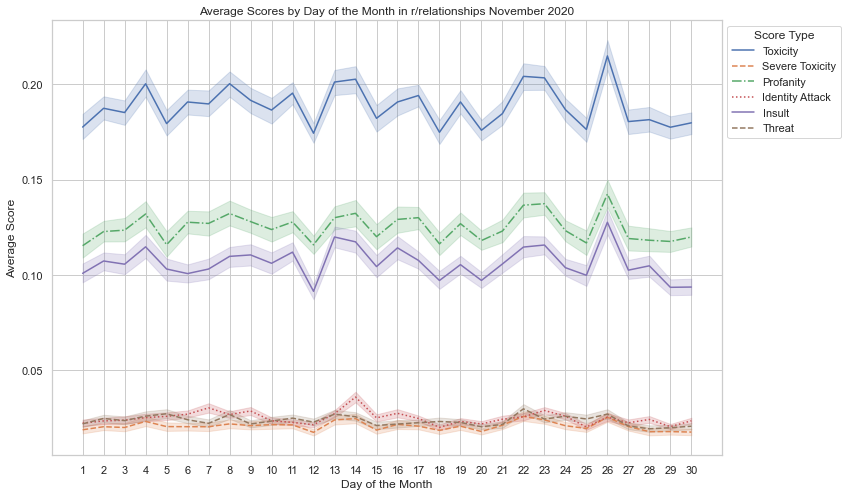

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_day", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_day", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_day", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_day", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_day", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_day", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(1, 31))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Day of the Month in r/relationships November 2020')
plt.xlabel("Day of the Month")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


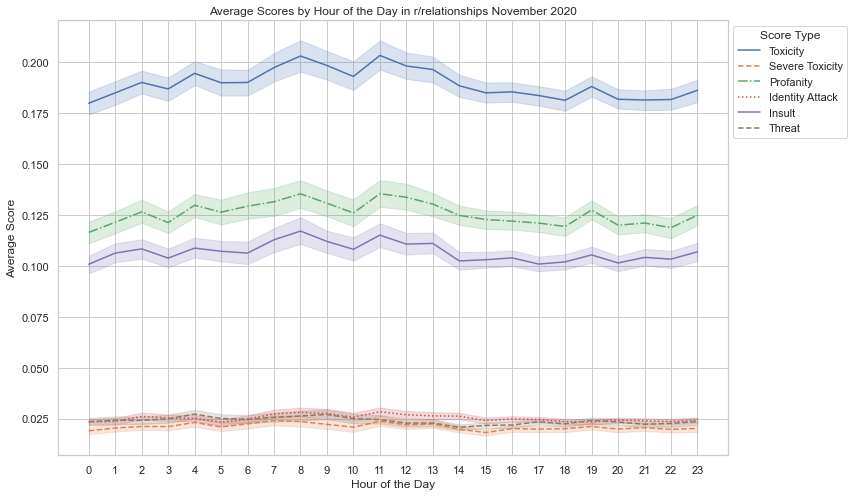

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setze das Erscheinungsbild auf "whitegrid" oder "white" für einen Hintergrund ohne Gittermuster
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12, 8))
dark_palette = ["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a"]

# Plot Line charts für jede Spalte
sns.lineplot(data=df, x="created_hour", y="Toxicity", label="Toxicity", palette="tab10")
sns.lineplot(data=df, x="created_hour", y="Severe Toxicity", label="Severe Toxicity", palette="tab10", linestyle='--')
sns.lineplot(data=df, x="created_hour", y="Profanity", label="Profanity", palette="tab10", linestyle='-.')
sns.lineplot(data=df, x="created_hour", y="Identity Attack", label="Identity Attack", palette="tab10", linestyle=':')
sns.lineplot(data=df, x="created_hour", y="Insult", label="Insult", palette="tab10", linestyle='-')
sns.lineplot(data=df, x="created_hour", y="Threat", label="Threat", palette="tab10", linestyle='--')

# Customize x-axis ticks to show more values
plt.xticks(range(0, 24))  # Zeige alle Stundenwerte an

plt.title('Average Scores by Hour of the Day in r/relationships November 2020')
plt.xlabel("Hour of the Day")
plt.ylabel('Average Score')

# Legende hinzufügen
plt.legend(title="Score Type", loc="upper left", bbox_to_anchor=(1, 1))

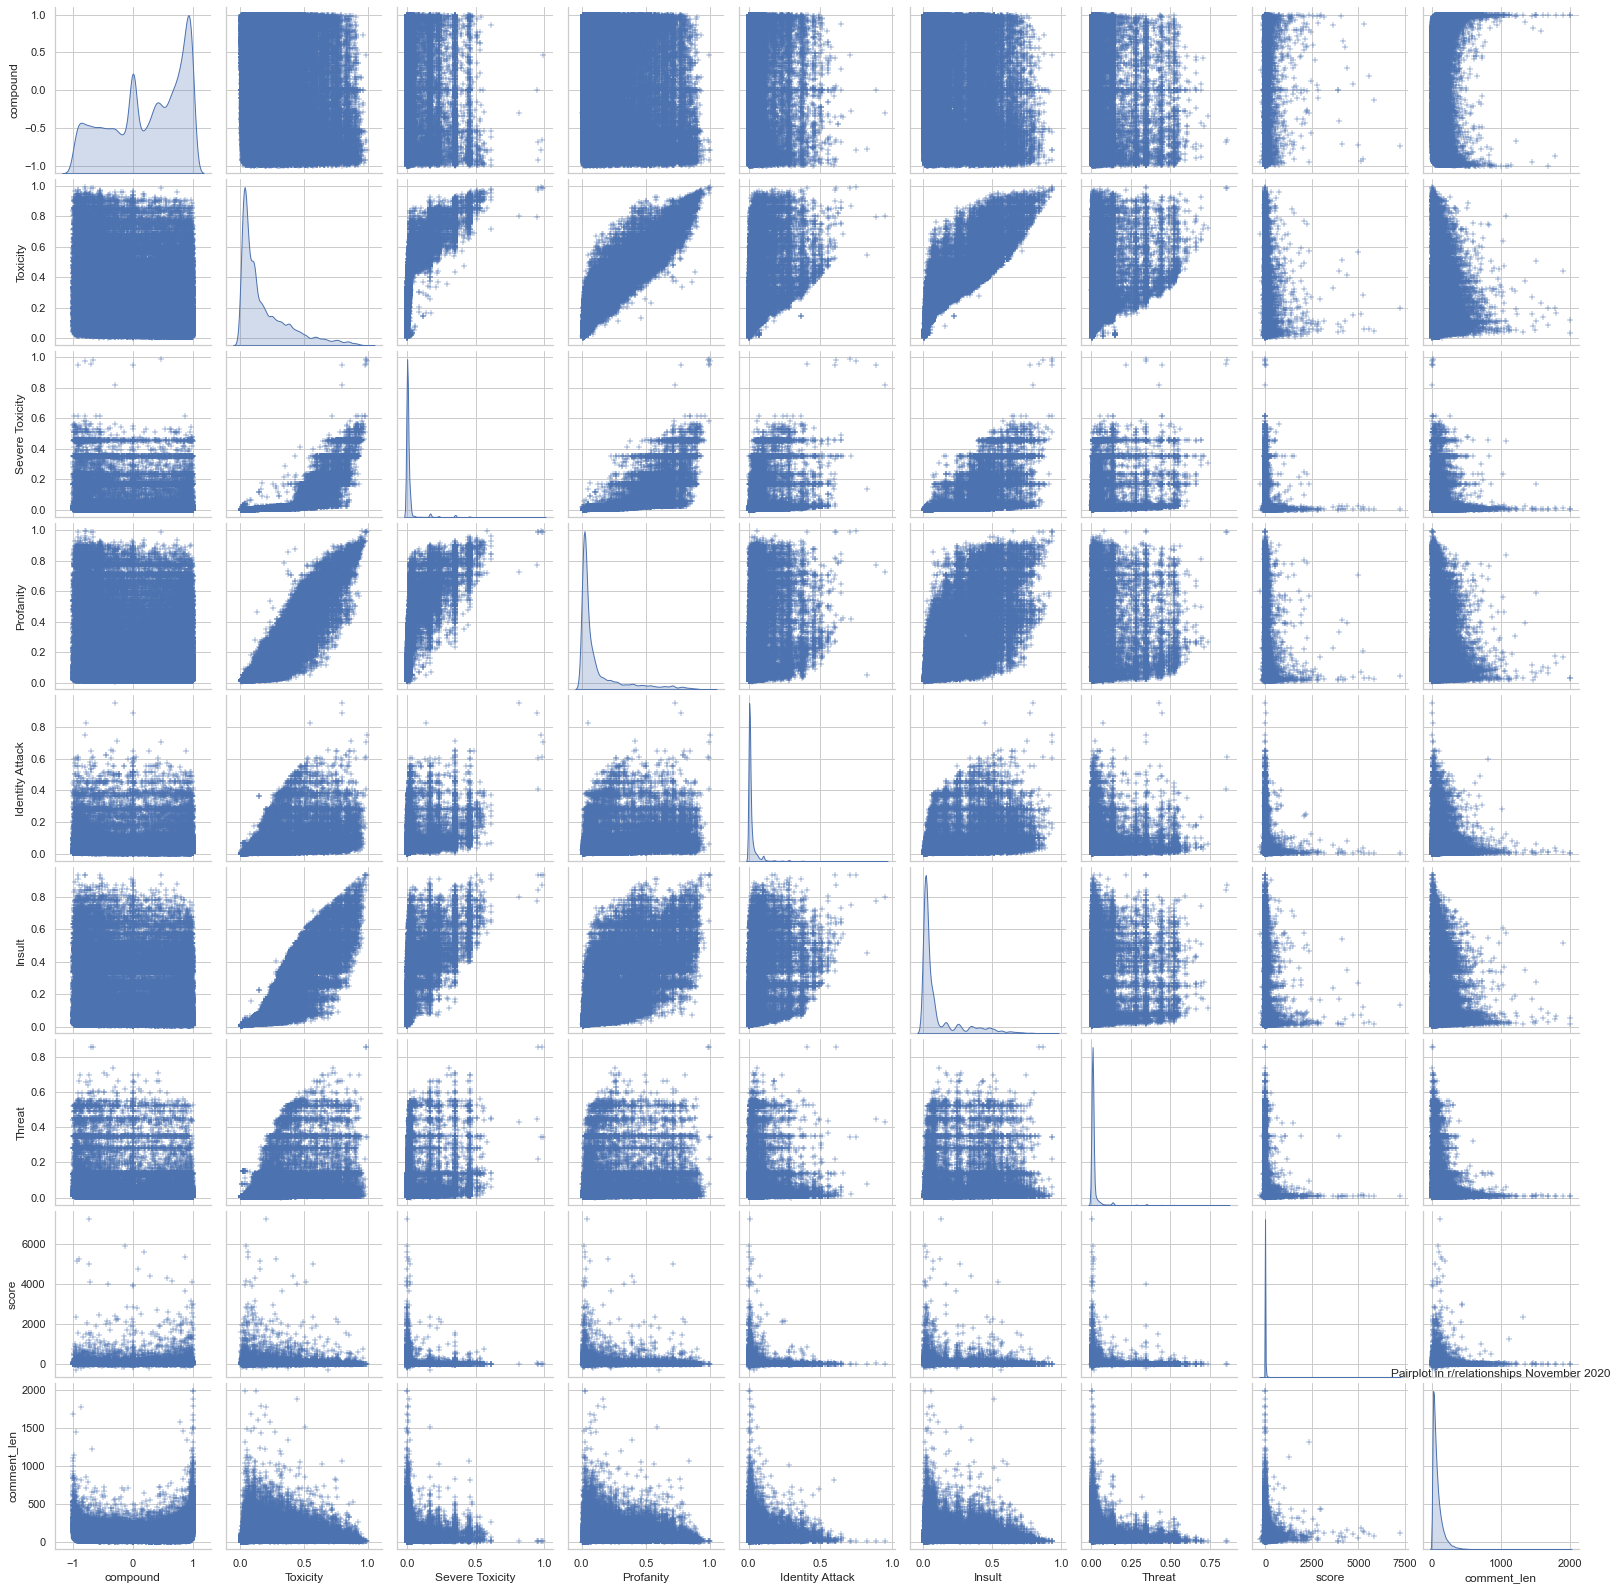

In [78]:
# Erstelle eine Pairplot-Matrix für ausgewählte Spalten
selected_columns = ['compound', 'Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat',"score","comment_len"]
sns.pairplot(df[selected_columns], diag_kind='kde', markers='+')
plt.title("Pairplot in r/relationships November 2020")
plt.show()




# Submission based

# Nr of toxcix users

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110323 entries, 0 to 110322
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   author                         110323 non-null  object 
 1   Toxicity                       109832 non-null  float64
 2   Severe Toxicity                109832 non-null  float64
 3   Profanity                      109832 non-null  float64
 4   Identity Attack                109832 non-null  float64
 5   Insult                         109832 non-null  float64
 6   Threat                         109832 non-null  float64
 7   body                           110323 non-null  object 
 8   controversiality               110323 non-null  bool   
 9   created_utc                    110323 non-null  object 
 10  edited                         110323 non-null  bool   
 11  gilded                         110323 non-null  int64  
 12  id                            

In [80]:
import pandas as pd

# Kategorien für die Berechnung
categories = ['Toxicity', 'Severe Toxicity', 'Profanity', 'Identity Attack', 'Insult', 'Threat']

# DataFrame für die Ergebnisse erstellen
results_df = pd.DataFrame(columns=['Category', 'NumToxicUsers'])

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Ergebnisse zum DataFrame hinzufügen
    results_df = results_df.append({'Category': category, 'NumToxicUsers': num_toxic_users_category}, ignore_index=True)

# Ausgabe der Ergebnisse
print(results_df)





          Category NumToxicUsers
0         Toxicity           531
1  Severe Toxicity             1
2        Profanity           488
3  Identity Attack             1
4           Insult            89
5           Threat             2


In [81]:
# DataFrame für prozentuale Ergebnisse erstellen
percentage_results_df = pd.DataFrame(columns=['Category', 'PercentToxicUsers'])

# Gesamtanzahl der Benutzer
total_users = df['author'].nunique()

for category in categories:
    # Gruppiere den DataFrame nach 'user_id' und berechne den Durchschnitt für jede Kategorie
    user_category_mean = df.groupby('author')[category].mean().reset_index()

    # Filtere Benutzer mit einem Durchschnitt von 0,7 oder größer
    toxic_users_category = user_category_mean[user_category_mean[category] >= 0.7]

    # Zähle die Anzahl der toxischen Benutzer für die Kategorie
    num_toxic_users_category = toxic_users_category.shape[0]

    # Berechne den prozentualen Anteil toxischer Benutzer für die Kategorie
    percent_toxic_users_category = (num_toxic_users_category / total_users) * 100

    # Ergebnisse zum DataFrame hinzufügen
    percentage_results_df = percentage_results_df.append({'Category': category, 'PercentToxicUsers': percent_toxic_users_category}, ignore_index=True)

# Ausgabe der prozentualen Ergebnisse
print(percentage_results_df)



          Category  PercentToxicUsers
0         Toxicity           1.972731
1  Severe Toxicity           0.003715
2        Profanity           1.812981
3  Identity Attack           0.003715
4           Insult           0.330646
5           Threat           0.007430
